# Predicting Employee Attrition in Recession

# Overview of Problem

As the COVID-19 keeps unleashing its havoc, the world continues to get pushed into the crisis of the great economic recession, more and more companies start to cut down their underperforming employees. Companies firing hundreds and thousands of Employees is a typical headline today. Cutting down employees or reducing an employee salary is a tough decision to take. It needs to be taken with utmost care as imprecision in the identification of employees whose performance is attriting may lead to sabotaging of both employees' career and the company's reputation in the market.

## Aim of The Competition

To predict Employee Attrition by the given data about his/her past history.

## Acknowledgements

We thank IBM for providing us with the dataset.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import preprocessing

# Machine Learning Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# Displaying Plots Inline
%matplotlib inline

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


## Importing Training Data

In [2]:
# Reading the CSV file into a DataFrame
df = pd.read_csv("train.csv", index_col=0)

# Displaying the first few rows of the DataFrame to get an overview of the data
df.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
Id,,,,,,,,,,,,,,,,,,,,,
1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,...,3,0,12,2,11,7,6,7,4,1
2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,...,3,2,7,2,3,2,1,1,2,1
3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,3,0,12,3,9,7,7,3,5,1
4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,...,3,0,18,2,7,7,1,7,4,1
5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,...,3,1,10,2,10,7,7,8,1,1


In [3]:
# Accessing the shape of a DataFrame
print(df.shape)


(1628, 28)


This informs us that our dataset comprises 28 attributes, including 'Attrition'.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1628 entries, 1 to 1628
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1628 non-null   int64 
 1   Attrition                1628 non-null   int64 
 2   BusinessTravel           1628 non-null   object
 3   Department               1628 non-null   object
 4   DistanceFromHome         1628 non-null   int64 
 5   Education                1628 non-null   int64 
 6   EducationField           1628 non-null   object
 7   EmployeeNumber           1628 non-null   int64 
 8   EnvironmentSatisfaction  1628 non-null   int64 
 9   Gender                   1628 non-null   object
 10  JobInvolvement           1628 non-null   int64 
 11  JobRole                  1628 non-null   object
 12  JobSatisfaction          1628 non-null   int64 
 13  MaritalStatus            1628 non-null   object
 14  MonthlyIncome            1628 non-null   int6

This indicates that out of the 28 attributes, 7 are of the 'object' data type. To utilize them in our machine learning model, we'll need to convert them to the 'int' data type.

In [5]:
print(df['BusinessTravel'].unique())

print(df['Department'].unique())

print(df['EducationField'].unique())

print(df['MaritalStatus'].unique())

print(df['Gender'].unique())

print(df['OverTime'].unique())

print(df['JobRole'].unique())

['Non-Travel' 'Travel_Rarely' 'Travel_Frequently']
['Research & Development' 'Sales' 'Human Resources']
['Medical' 'Life Sciences' 'Other' 'Marketing' 'Technical Degree'
 'Human Resources']
['Single' 'Married' 'Divorced']
['Female' 'Male']
['No' 'Yes']
['Laboratory Technician' 'Manufacturing Director' 'Sales Executive'
 'Research Scientist' 'Sales Representative' 'Healthcare Representative'
 'Research Director' 'Human Resources' 'Manager']


The previous step assists us in identifying the unique elements present in each attribute.

##  Converting Categorical Data to Numerical Data

In [6]:

# Mapping BusinessTravel categories to numerical values
df.BusinessTravel[df.BusinessTravel == 'Non-Travel'] = 0
df.BusinessTravel[df.BusinessTravel == 'Travel_Rarely'] = 1
df.BusinessTravel[df.BusinessTravel == 'Travel_Frequently'] = 2

# Mapping Department categories to numerical values
df.Department[df.Department == 'Research & Development'] = 0
df.Department[df.Department == 'Sales'] = 1
df.Department[df.Department == 'Human Resources'] = 2

# Mapping EducationField categories to numerical values
df.EducationField[df.EducationField == 'Medical'] = 0
df.EducationField[df.EducationField == 'Life Sciences'] = 1
df.EducationField[df.EducationField == 'Other'] = 2
df.EducationField[df.EducationField == 'Marketing'] = 3
df.EducationField[df.EducationField == 'Technical Degree'] = 4
df.EducationField[df.EducationField == 'Human Resources'] = 5

# Mapping MaritalStatus categories to numerical values
df.MaritalStatus[df.MaritalStatus == 'Single'] = 0
df.MaritalStatus[df.MaritalStatus == 'Married'] = 1
df.MaritalStatus[df.MaritalStatus == 'Divorced'] = 2

# Mapping Gender categories to numerical values
df.Gender[df.Gender == 'Male'] = 0
df.Gender[df.Gender == 'Female'] = 1

# Mapping OverTime categories to numerical values
df.OverTime[df.OverTime == 'No'] = 0
df.OverTime[df.OverTime == 'Yes'] = 1

# Mapping JobRole categories to numerical values
df.JobRole[df.JobRole == 'Laboratory Technician'] = 0
df.JobRole[df.JobRole == 'Manufacturing Director'] = 1
df.JobRole[df.JobRole == 'Sales Executive'] = 2
df.JobRole[df.JobRole == 'Research Scientist'] = 3
df.JobRole[df.JobRole == 'Sales Representative'] = 4
df.JobRole[df.JobRole == 'Healthcare Representative'] = 5
df.JobRole[df.JobRole == 'Research Director'] = 6
df.JobRole[df.JobRole == 'Human Resources'] = 7
df.JobRole[df.JobRole == 'Manager'] = 8


# Displaying the DataFrame after converting categorical data to numerical data
(df.head())


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
Id,,,,,,,,,,,,,,,,,,,,,
1,30,0,0,0,2,3,0,571,3,1,...,3,0,12,2,11,7,6,7,4,1
2,36,0,1,0,12,4,1,1614,3,1,...,3,2,7,2,3,2,1,1,2,1
3,55,1,1,1,2,1,0,842,3,0,...,3,0,12,3,9,7,7,3,5,1
4,39,0,1,0,24,1,1,2014,1,0,...,3,0,18,2,7,7,1,7,4,1
5,37,0,1,0,3,3,2,689,3,0,...,3,1,10,2,10,7,7,8,1,1


We converted categorical data into numerical data by analyzing the data beforehand using "df['Attribute'].unique()", which indicates the number of unique strings stored in an attribute.

In [7]:
df.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,...,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.0
mean,35.645577,0.482187,9.735258,2.884521,1000.985872,2.646192,2.650491,2.639435,5785.524570,2.761671,...,3.155405,0.692260,9.949017,2.752457,6.092752,3.614865,2.049140,3.551597,3.135749,1.0
std,9.481794,0.499836,8.306546,1.020470,585.417694,1.125283,0.736330,1.096272,4339.293147,2.549995,...,0.362402,0.864808,7.482936,1.288033,5.921168,3.481051,3.138287,3.494369,1.408770,0.0
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,29.000000,0.000000,2.000000,2.000000,509.250000,2.000000,2.000000,2.000000,2625.000000,1.000000,...,3.000000,0.000000,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.0
50%,34.000000,0.000000,8.000000,3.000000,977.000000,3.000000,3.000000,3.000000,4304.000000,2.000000,...,3.000000,0.000000,8.000000,3.000000,5.000000,2.000000,1.000000,2.000000,3.000000,1.0
75%,42.000000,1.000000,15.000000,4.000000,1494.000000,4.000000,3.000000,4.000000,7124.250000,4.000000,...,3.000000,1.000000,13.000000,3.000000,8.000000,7.000000,2.000000,7.000000,4.000000,1.0
max,60.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,4.000000,19999.000000,9.000000,...,4.000000,3.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000,5.000000,1.0


# Analyzing  Our Dataset 

# 1.) Observation: Constant Attribute "Behaviour"

For the attribute "Behaviour", the mean is equivalent to 1 and the standard deviation is 0. The minimum and maximum values are also 1, indicating that this attribute is constant throughout our dataset. Therefore, we will drop this attribute.

# 2.) Insight: Age vs. Attrition Trend

<Axes: xlabel='Age', ylabel='count'>

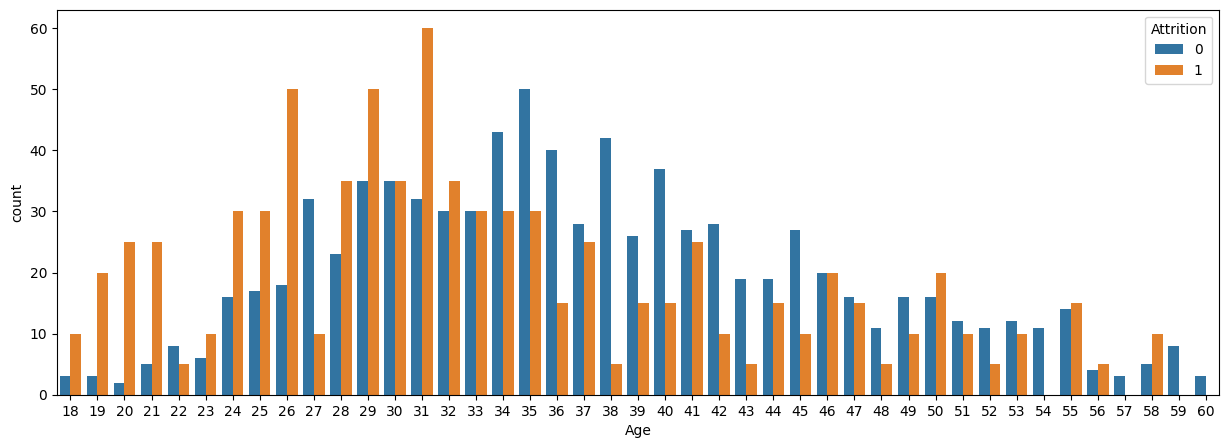

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(hue='Attrition',data=df,x='Age')

The graph indicates a clear trend: younger employees are more likely to leave the company, while older individuals show a preference for stability.

# 3.) Insight: Attrition Probability Over Time

<Axes: xlabel='TotalWorkingYears', ylabel='count'>

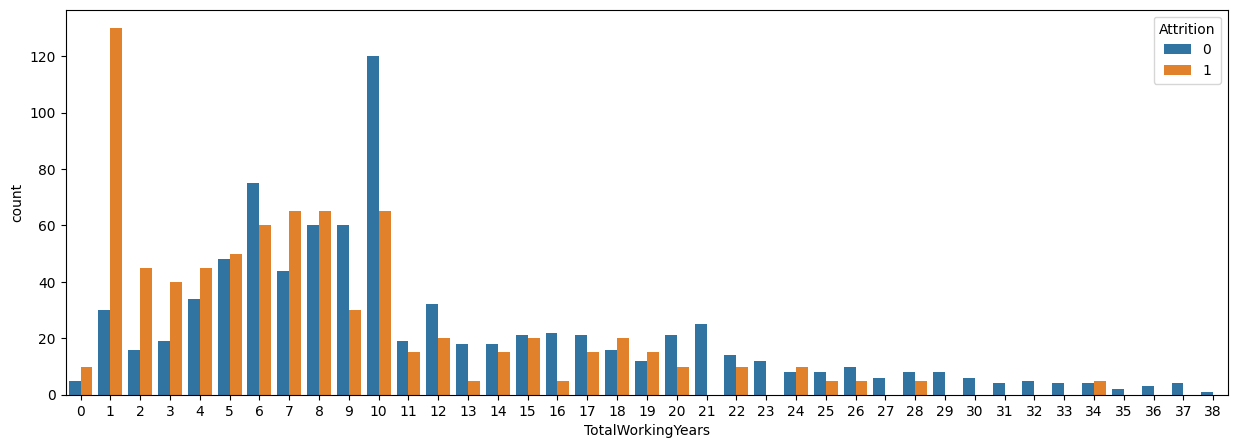

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(hue='Attrition',data=df,x='TotalWorkingYears')

The graph suggests that new employees are more likely to leave the company within the first year, but as time progresses, the likelihood of an employee leaving diminishes.

## 4.) Checking and Handling Duplicate or Multiple Entries

In [10]:

# Checking for duplicate entries based on 'EmployeeNumber' and removing them
df.drop_duplicates(subset='EmployeeNumber', inplace=True)

# Displaying the Number of Rows and Columns in the New Data
print("Number of rows and columns in the new data:", df.shape)


Number of rows and columns in the new data: (1000, 28)


It's possible that our dataset contains duplicates, which could impact our predictions. To mitigate this, we'll remove any rows with identical employee numbers.

In [11]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
Id,,,,,,,,,,,,,,,,,,,,,
1,30,0,0,0,2,3,0,571,3,1,...,3,0,12,2,11,7,6,7,4,1
2,36,0,1,0,12,4,1,1614,3,1,...,3,2,7,2,3,2,1,1,2,1
3,55,1,1,1,2,1,0,842,3,0,...,3,0,12,3,9,7,7,3,5,1
4,39,0,1,0,24,1,1,2014,1,0,...,3,0,18,2,7,7,1,7,4,1
5,37,0,1,0,3,3,2,689,3,0,...,3,1,10,2,10,7,7,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,36,0,0,1,10,4,0,592,2,0,...,3,0,10,3,10,3,9,7,4,1
997,40,0,1,0,16,3,1,1641,3,1,...,3,0,18,2,4,2,3,3,2,1
998,46,1,1,1,9,2,0,118,3,0,...,3,0,9,3,9,8,4,7,4,1


In [12]:
y = df['Attrition']
X = df.drop(['Attrition', 'Behaviour'], axis=1)

### StandardScaler Initialization

By examining the output of "df.describe()", we have determined the mean, standard deviation, maximum, and minimum values of all attributes.

Maximum ≈ Mean + 3*standard-deviation

Minimum ≈ Mean - 3*standard-deviation

"≈" stands for approximately due to this reason all Attribute's of our dataset follow Gaussian Distribution. Therefore we will use "Z-score normalization" or "Standard scaling".

In [13]:
from sklearn.preprocessing import StandardScaler

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5000)

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting and transforming the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transforming the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


# Rough Models Evaluation

## RandomForestClassifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# RandomForestClassifier with scaled data
xg_rf_scaled = RandomForestClassifier()
xg_rf_scaled.fit(X_train_scaled, y_train)
y_pred_rf_scaled = xg_rf_scaled.predict(X_test_scaled)

f1_rf_scaled = f1_score(y_test, y_pred_rf_scaled, average='weighted')
print("RandomForestClassifier with scaled data F1 Score:", f1_rf_scaled)


RandomForestClassifier with scaled data F1 Score: 0.8318482802957249


## DecisionTreeClassifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier with scaled data
xg_dt_scaled = DecisionTreeClassifier()
xg_dt_scaled.fit(X_train_scaled, y_train)
y_pred_dt_scaled = xg_dt_scaled.predict(X_test_scaled)

f1_dt_scaled = f1_score(y_test, y_pred_dt_scaled, average='weighted')
print("DecisionTreeClassifier with scaled data F1 Score:", f1_dt_scaled)


DecisionTreeClassifier with scaled data F1 Score: 0.7934571175950487


## AdaBoostClassifier

In [16]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoostClassifier with scaled data
xg_ab_scaled = AdaBoostClassifier()
xg_ab_scaled.fit(X_train_scaled, y_train)
y_pred_ab_scaled = xg_ab_scaled.predict(X_test_scaled)

f1_ab_scaled = f1_score(y_test, y_pred_ab_scaled, average='weighted')
print("AdaBoostClassifier with scaled data F1 Score:", f1_ab_scaled)


AdaBoostClassifier with scaled data F1 Score: 0.8795971505772537


## LogisticRegression

In [17]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression with scaled data
xg_lr_scaled = LogisticRegression()
xg_lr_scaled.fit(X_train_scaled, y_train)
y_pred_lr_scaled = xg_lr_scaled.predict(X_test_scaled)

f1_lr_scaled = f1_score(y_test, y_pred_lr_scaled, average='weighted')
print("LogisticRegression with scaled data F1 Score:", f1_lr_scaled)


LogisticRegression with scaled data F1 Score: 0.8843428571428573


## SVC

In [18]:
from sklearn.svm import SVC

# SVC with scaled data
xg_svc_scaled = SVC()
xg_svc_scaled.fit(X_train_scaled, y_train)
y_pred_svc_scaled = xg_svc_scaled.predict(X_test_scaled)

f1_svc_scaled = f1_score(y_test, y_pred_svc_scaled, average='weighted')
print("SVC with scaled data F1 Score:", f1_svc_scaled)


SVC with scaled data F1 Score: 0.7952688172043011


## ANN

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

# Initializing the MLPClassifier
ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Training the model
ann_model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_ann = ann_model.predict(X_test_scaled)

# Calculating accuracy
accuracy_ann = accuracy_score(y_test, y_pred_ann)

# Calculating F1 score
f1_ann_scaled = f1_score(y_test, y_pred_ann, average='weighted')

# Printing the results
print("ANN with scaled data Accuracy:", accuracy_ann)
print("ANN with scaled data F1 Score:", f1_ann_scaled)


ANN with scaled data Accuracy: 0.84
ANN with scaled data F1 Score: 0.84


## Ensemble

In [20]:
from sklearn.ensemble import VotingClassifier

# Ensembling of All Models
models = [('RandomForest', RandomForestClassifier()),
          ('DecisionTree', DecisionTreeClassifier()),
          ('AdaBoost', AdaBoostClassifier()),
          ('LogisticRegression', LogisticRegression()),
          ('SVC', SVC()), ('ANN', ann_model)]

# Creating a VotingClassifier with hard voting
ensemble_model = VotingClassifier(estimators=models, voting='hard')
ensemble_model.fit(X_train_scaled, y_train)
y_pred_ensemble_scaled = ensemble_model.predict(X_test_scaled)

f1_ensemble_scaled = f1_score(y_test, y_pred_ensemble_scaled, average='weighted')
print("Ensemble Model with scaled data F1 Score:", f1_ensemble_scaled)


Ensemble Model with scaled data F1 Score: 0.8389130434782609


## Fine-tuning Logistic Regression Hyperparameters

Among all the models, Logistic Regression gives us the best result. Let's modify hyperparameters to get a more accurate result. We improved our model's performance by applying regularization through penalty terms.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Defining the parameter grid to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty type
    'solver': ['liblinear', 'saga']  # Solver type
}

# Creating a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1_weighted')

# Fitting the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Getting the best parameters
best_params = grid_search.best_params_

# Using the best parameters to train the model
best_lr_model = LogisticRegression(max_iter=1000, **best_params)
best_lr_model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_lr_scaled = best_lr_model.predict(X_test_scaled)

# Calculating the F1 score
f1_lr_scaled = f1_score(y_test, y_pred_lr_scaled, average='weighted')

print("Best Parameters:", best_params)
print("LogisticRegression with scaled data F1 Score (after tuning):", f1_lr_scaled)


Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression with scaled data F1 Score (after tuning): 0.8843428571428573


### Loading test data and seeing our model prediction 

In [22]:
# Loading the test data
dft = pd.read_csv("test.csv", index_col=0)

# Mapping categorical variables to numerical values

# Mapping BusinessTravel categories to numerical values
dft['BusinessTravel'] = dft['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})

# Mapping Department categories to numerical values
dft['Department'] = dft['Department'].map({'Research & Development': 0, 'Sales': 1, 'Human Resources': 2})

# Mapping EducationField categories to numerical values
dft['EducationField'] = dft['EducationField'].map({'Medical': 0, 'Life Sciences': 1, 'Other': 2, 'Marketing': 3,
                                                   'Technical Degree': 4, 'Human Resources': 5})

# Mapping MaritalStatus categories to numerical values
dft['MaritalStatus'] = dft['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Divorced': 2})

# Mapping Gender categories to numerical values
dft['Gender'] = dft['Gender'].map({'Male': 0, 'Female': 1})

# Mapping OverTime categories to numerical values
dft['OverTime'] = dft['OverTime'].map({'No': 0, 'Yes': 1})

# Mapping JobRole categories to numerical values
dft['JobRole'] = dft['JobRole'].map({'Laboratory Technician': 0, 'Manufacturing Director': 1, 'Sales Executive': 2,
                                     'Research Scientist': 3, 'Sales Representative': 4, 'Healthcare Representative': 5,
                                     'Research Director': 6, 'Human Resources': 7, 'Manager': 8})

# Dropping 'Behaviour' column
dft = dft.drop(['Behaviour'], axis=1)

In [23]:
# Displaying the DataFrame after converting categorical data to numerical data
dft.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
Id,,,,,,,,,,,,,,,,,,,,,
1,28,1,0,9,3,0,377,4,0,3,...,23,4,1,5,3,5,2,0,4,5
2,31,1,1,6,4,0,653,1,0,4,...,22,4,2,13,4,7,7,5,7,3
3,37,1,0,6,3,0,474,3,0,4,...,13,3,2,13,2,7,7,6,7,4
4,42,1,0,1,2,1,827,4,1,2,...,13,3,1,8,4,4,3,0,2,5
5,45,0,0,4,2,1,972,3,0,3,...,12,3,0,9,5,9,7,0,8,2


## Evaluation Metrics


Following evaluation metric was used to analyse the performance of the model:

1.) F1_Score

In [24]:
# Making predictions using the best logistic regression model
predicted_attrition = best_lr_model.predict(dft)

# Loading actual values from the provided CSV file
actual_values = pd.read_csv('test_actual_values.csv', index_col='Id')['Attrition']

# Calculating the F1 score
f1_score_lr = f1_score(actual_values, predicted_attrition, average='weighted')

print("F1 Score (Logistic Regression):", f1_score_lr)

F1 Score (Logistic Regression): 0.8219994698922917
